In [7]:
import os
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import statistics

# Make sure the current working directory is correct
# os.chdir(os.path.dirname(os.path.abspath(__file__)))

graph_subtest_mean = True
graph_subtest_skips = False
generate = False
grade = "5"
target_path = f"../data/gr{grade}/gr{grade}_score.csv"
scores_path = "../Gates.ReadComp_By-Item_Gr3-5(CM).xlsx"
corpus_path = f"../subtest_txt/gr{grade}_paragraphs.txt"


sub_tests = []
with open(corpus_path,'r') as fp:
    sub_test = fp.readline()
    while sub_test:
        sub_tests.append(sub_test)
        sub_test = fp.readline()


df = pd.read_excel(scores_path)
sub_test_number = df.columns[1:]

# #gr3
# questions_ranges = [(1,5), (6,8), (9,13), (14,16), (17,21), (22,27), (28,30),
#                    (31,35), (36,40), (41,43), (44,48)]

#gr4
# questions_ranges = [(1,4), (5,8), (9,13), (14,16), (17,19), (20,25), (26,29),
#                    (30,34), (35,39), (40,44), (45,48)]

# # gr5
questions_ranges = [(1,3), (4,6), (7,11), (12,14), (15,19), (20,25), (26,30),
                   (31,34), (35,38), (39,43), (44,48)]

score_data = {}

for i in range(len(questions_ranges)):
    score_data[i+1] = []
    score_data["skip"+str(i+1)] = []

df = pd.read_excel(scores_path)

for i in df.index:
    for q_index, q_range in enumerate(questions_ranges):
        total_score = 0
        total_skip = 0
        for j in range(q_range[0],q_range[1]+1):
            if df[f"Gr{grade}.RC.Gates_"+"{:02d}".format(j)][i] == 1:
                total_score +=1
            if df[f"Gr{grade}.RC.Gates_"+"{:02d}".format(j)][i] == 2:
                total_skip += 1
        score_data[q_index+1].append(total_score/(q_range[1]-q_range[0]+1))
        score_data["skip"+str(q_index+1)].append(total_skip/(q_range[1]-q_range[0]+1))


skip_points_5 = []
for i in range(len(questions_ranges)):
    skip_points_5.append(statistics.mean(score_data["skip"+str(i+1)]))



In [8]:
print(skip_points_3)
print(skip_points_4)
print(skip_points_5)

[0.020143884892086333, 0.007194244604316547, 0.041726618705035974, 0.03597122302158273, 0.04316546762589928, 0.045563549160671464, 0.05275779376498801, 0.08776978417266187, 0.12805755395683452, 0.14628297362110312, 0.16258992805755396]
[0.0, 0.0, 0.0, 0.002398081534772182, 0.0, 0.001199040767386091, 0.0, 0.004316546762589928, 0.008633093525179856, 0.027338129496402876, 0.03597122302158273]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


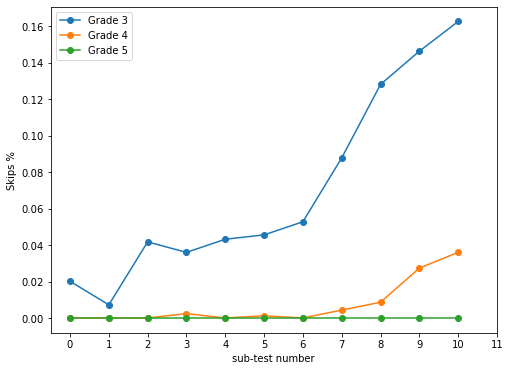

In [11]:
plt.figure(figsize=(8, 6))
plt.plot(skip_points_3,"o-",label = "Grade 3")
plt.plot(skip_points_4,"o-",label = "Grade 4")
plt.plot(skip_points_5,"o-",label = "Grade 5")
plt.ylabel("Skips %")
plt.xlabel("sub-test number")
plt.xticks(np.arange(0, 12, step=1))
plt.legend()
plt.show()